Author: Tracy Tran

Objective: Apply any preprocessing techiques on the Netflix Titles dataset before exploring and creating visualizations for business questions.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
upload = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


Read CSV file and view head of dataset

We have a total of 12 columns. Just viewing the top 5 rows, we can see that there is some cleaning that needs to be done (null values).

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Cleaning NULL values in 'rating' column

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.loc[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df['rating'].fillna('bfill',inplace=True)

First, we're fixing any NULL values in the 'rating' column. Since there is only 3 values missing, we can either use a forward or backward fill. In this case, I used a backward fill.

In [ ]:
df['rating'].isnull().sum()

0

## Fixing the 'duration' column

In [ ]:
df.loc[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


To fix the 'duration' column, we are returning all NULL values in the 'duration' column. As we can see, their corresponding 'rating' value is actually the duration. This means we must fix both columns. We need to move the 'rating' values over to the 'duration' column.

In [ ]:
df['rating'].value_counts() # every other value is a rating except the last three (rating is not measured by minutes, that is duration)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
bfill          4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
df.loc[df['rating'].str.contains('min')] # return all values in the rating column that contains 'min'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df['duration'].isnull(), 'duration'] = df['rating']

Once we identified which rows have a NULL duration, we replace NULL with the'rating' value.

Another method is to use the 'replace' method: .replace(np.nan, '#')

This method would only work if we have a few values to replace since it is time consuming.

In [ ]:
df[df['show_id'] == 's5542']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:
df.loc[df['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


To check whether our code work, we can either search for the rows based on its 'show_id' or return all rows that contain 'min' in its 'rating' column. The second method works because we haven't fixed this column yet.

In [ ]:
df['duration'].isnull().sum()

0

## Fixing the 'rating' column

Now that our 'duration' column have consistent and the correct values, we can now fix our 'rating' column. Again, ratings are not measured in minutes so we must fix any row that contain minutes. We have already identified them above/earlier.

In [ ]:
df.loc[df['rating'].str.contains('min')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.loc[df['rating'].str.contains('min'), 'rating'] = np.nan

Again, we return all rows that contain the string 'min' as their value in the 'rating' column.

Once identified, we only call the 'rating' column and set those values to NULL. If we do not specificy which column, the whole row will become NULL.

Finally, we can either use forward or backward fill to fill in the NULL values and drop all other NULL values.

In [ ]:
df.loc[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df['rating'].fillna(method='bfill', inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['rating'].value_counts()

TV-MA       1823
TV-14       1215
R            778
PG-13        470
TV-PG        432
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
bfill          1
Name: rating, dtype: int64

In [ ]:
df.loc[df['rating'].str.contains('bfill'), 'rating'] = 'NC-17'

## Visualizations and Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Dark2")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


1. Which type of film is more popular: Movies or TV Shows?

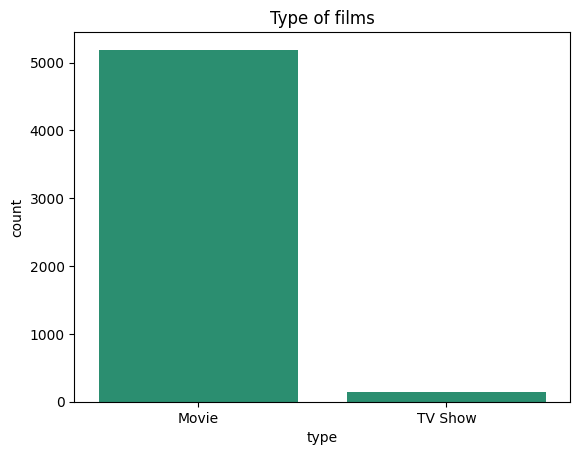

In [ ]:
sns.countplot(x='type', data=df)
plt.title('Type of films');

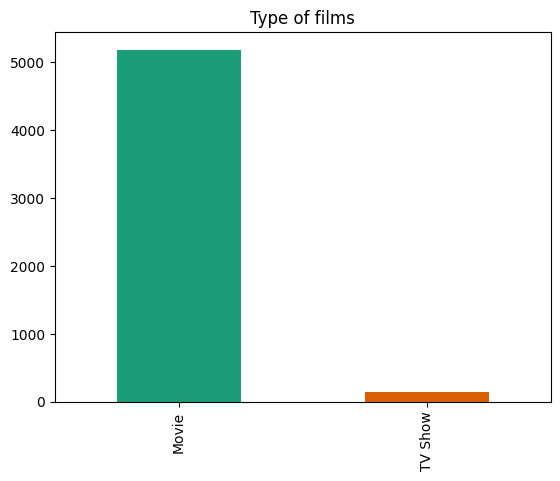

In [ ]:
df['type'].value_counts().plot(kind='bar', color= sns.palettes.mpl_palette('Dark2'))
plt.title('Type of films');

In [ ]:
df['type'].value_counts()

Movie      5189
TV Show     147
Name: type, dtype: int64

Based on the chart, we can see that most consumers prefer watching movies over TV shows. One explanation could be that our consumers have full-time jobs so they don't have time to watch 13 episode shows. Even though movies are around 1 to 2 hours in length, they are quicker to finish within a night and the story/plot is complete.

2. Movies and shows mostly have what type of Rating? Why might this be the case? Which is the least common type of Rating?

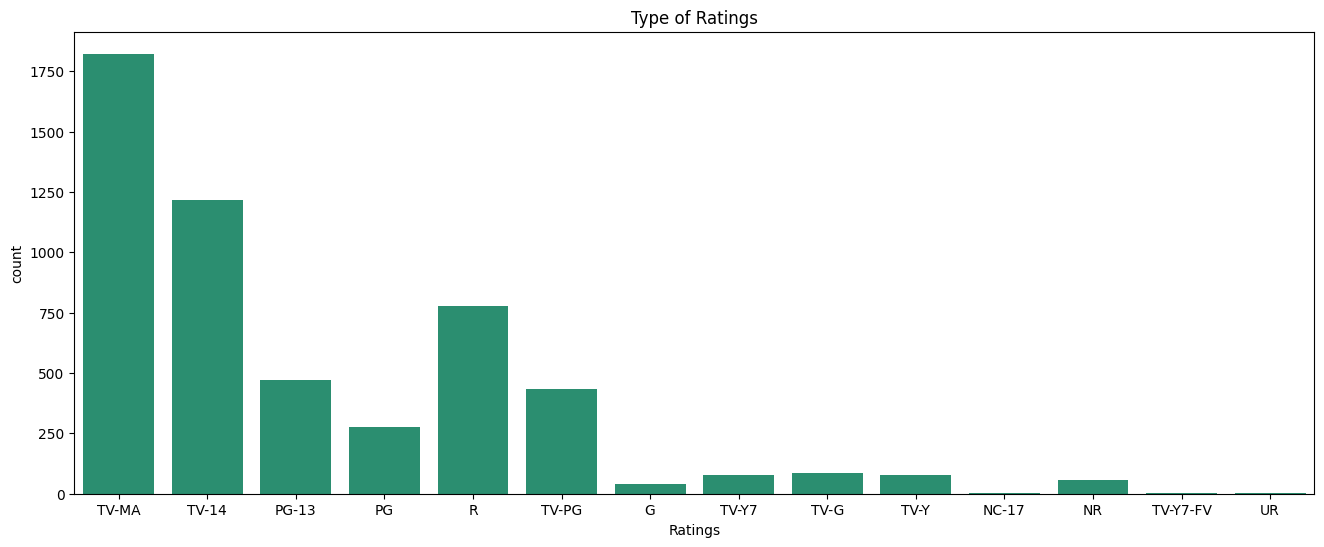

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='rating', data=df)
plt.title("Type of Ratings")
plt.xlabel("Ratings");

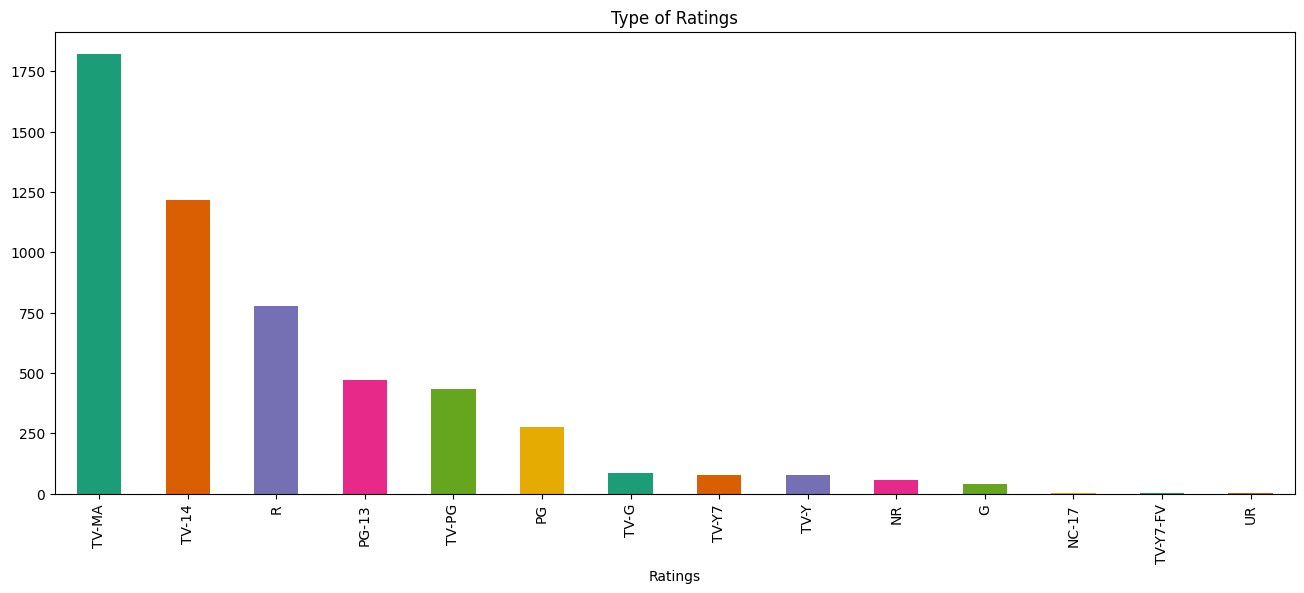

In [ ]:
df['rating'].value_counts().plot(kind='bar', figsize=(16,6), color= sns.palettes.mpl_palette('Dark2'))
plt.title("Type of Ratings")
plt.xlabel("Ratings");

In [ ]:
df['rating'].value_counts()

TV-MA       1823
TV-14       1215
R            778
PG-13        470
TV-PG        432
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
NC-17          3
TV-Y7-FV       3
UR             3
Name: rating, dtype: int64

Most common ratings are TV-MA, TV-14, and R on Netflix. TV-MA are shows and movies that are made for adults and is unsuitable for children under 17 (Wikipedia). This makes sense because Netflix has two seperate channels, one for adults and the other for children. This dataset is possibly scrapped from the adult channel so most films are unsuitable for children. TV-14 and rated R are materials not made for children.

The least type of ratings are UR, TV-Y7-FV, and NC-17.

3. Visualize the type of film with ratings. Are there more TV-MA shows or movies? Why might this be the case?

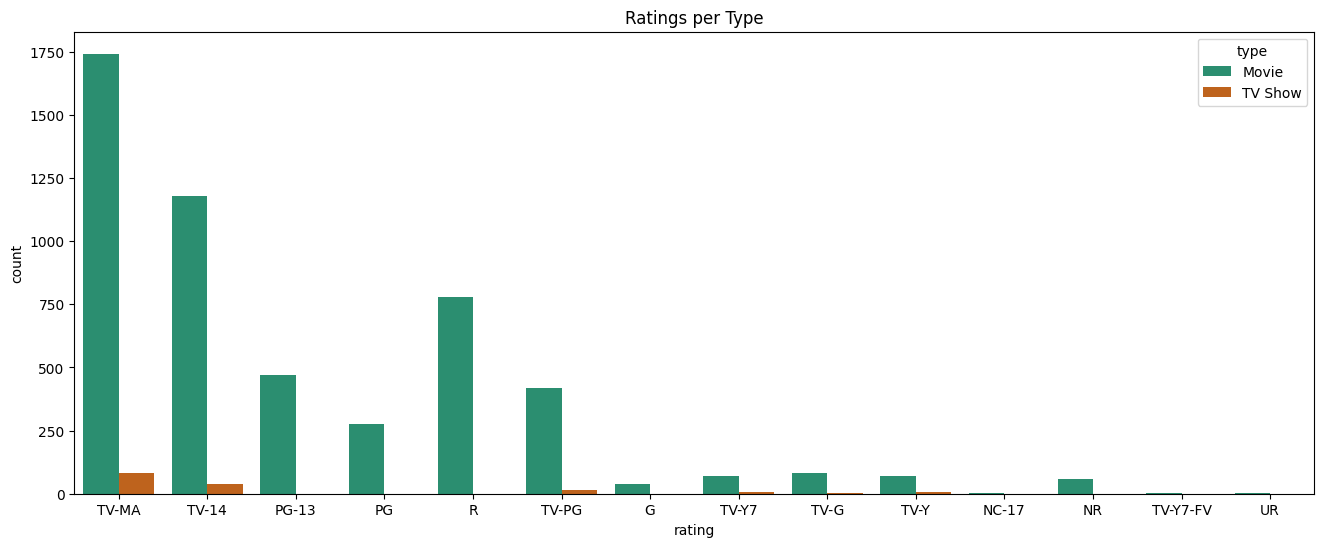

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='rating', hue='type', data=df)
plt.title("Ratings per Type");

Without a doubt, there more movies than shows that are unsutiable for children. There are none PG-13, PG, and Rated R TV shows, which I find to be surprising because I can think of a couple of PG-13 rated shows. One explanation could be due to the fact we dropped all NULL rows.

In [ ]:
df['rating'].groupby(df['type']).value_counts()

type     rating  
Movie    TV-MA       1742
         TV-14       1178
         R            778
         PG-13        470
         TV-PG        417
         PG           275
         TV-G          81
         TV-Y          71
         TV-Y7         70
         NR            58
         G             40
         NC-17          3
         TV-Y7-FV       3
         UR             3
TV Show  TV-MA         81
         TV-14         37
         TV-PG         15
         TV-Y7          6
         TV-Y           5
         TV-G           3
Name: rating, dtype: int64

4. What are the most watched/uploaded categories on Netflix? Which has the least?

In [ ]:
categories = ", ".join(df['listed_in']).split(", ")
# join concates everyting into a single string with a comma, then is split by comma

In [ ]:
from collections import Counter

In [ ]:
Counter(categories).most_common(10)

[('International Movies', 2369),
 ('Dramas', 2294),
 ('Comedies', 1553),
 ('Action & Adventure', 806),
 ('Independent Movies', 740),
 ('Romantic Movies', 579),
 ('Thrillers', 547),
 ('Children & Family Movies', 503),
 ('Documentaries', 391),
 ('Horror Movies', 336)]

'Counter' allows us to group and count the categories. We are then able to use the function 'most_common' to find the top #.

In [ ]:
categories_df = pd.DataFrame(categories)

In [ ]:
categories_df.value_counts().head(10)

International Movies        2369
Dramas                      2294
Comedies                    1553
Action & Adventure           806
Independent Movies           740
Romantic Movies              579
Thrillers                    547
Children & Family Movies     503
Documentaries                391
Horror Movies                336
dtype: int64

In [ ]:
top_1o_cats = categories_df.value_counts().sort_values(ascending=False).head(10)

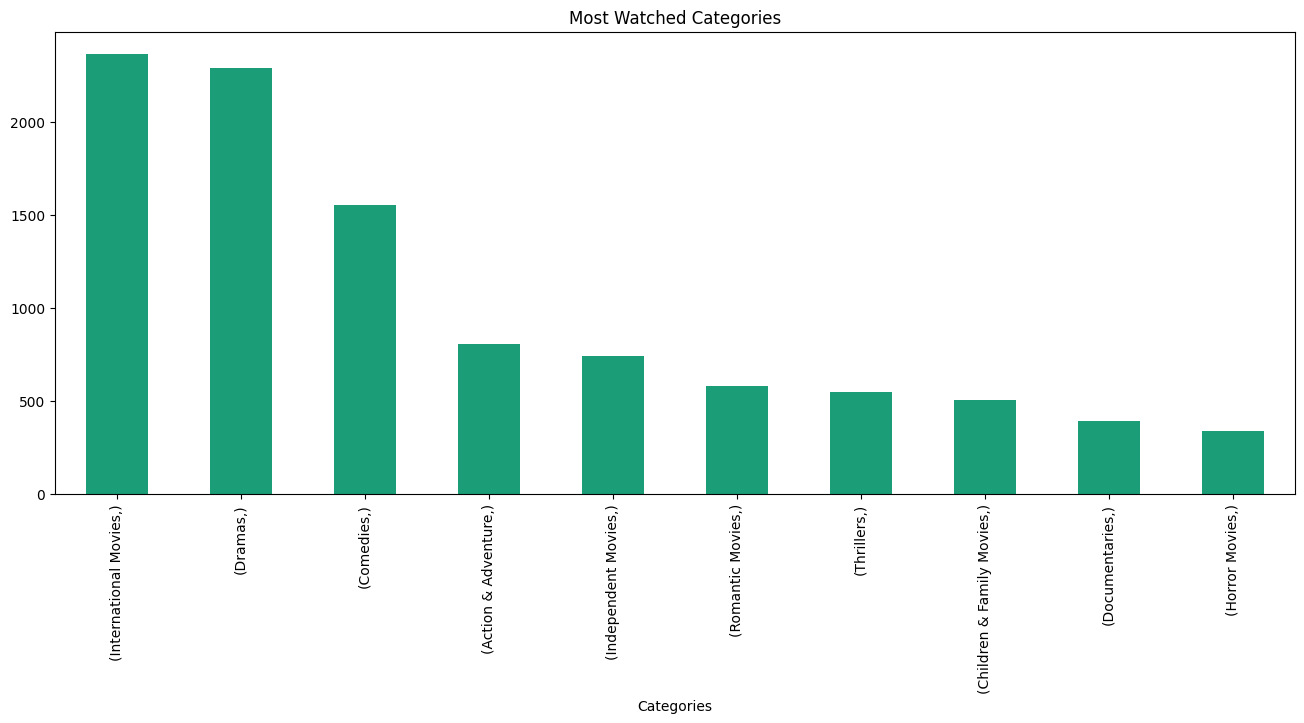

In [ ]:
top_1o_cats.plot(kind='bar', figsize=(16,6))
plt.title("Most Watched Categories")
plt.xlabel("Categories");

In [ ]:
bottom_10_cats = categories_df.value_counts().sort_values(ascending=True).head(10)

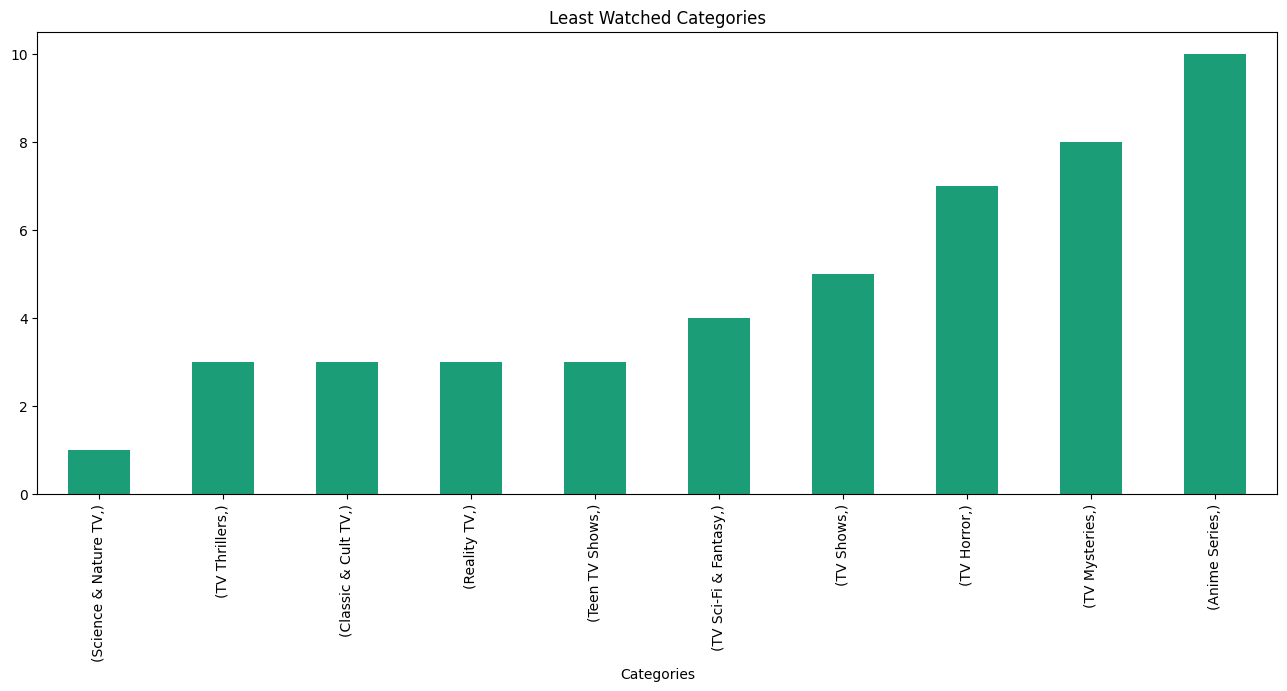

In [ ]:
bottom_10_cats.plot(kind='bar', figsize=(16,6))
plt.title("Least Watched Categories")
plt.xlabel("Categories");

The most watched categories include International Movies, Dramas, Comedies, Action and Adventure, Indepedent Movies, Romactic Movies, Thrillers, Children and Family Movies, Documentaries, and Horror Movies. Least watched categories include Science and Nature TV, TV Thrillers, Classic and Cult TV, and more.

5. Which year had the most content released? Why might this be the case?

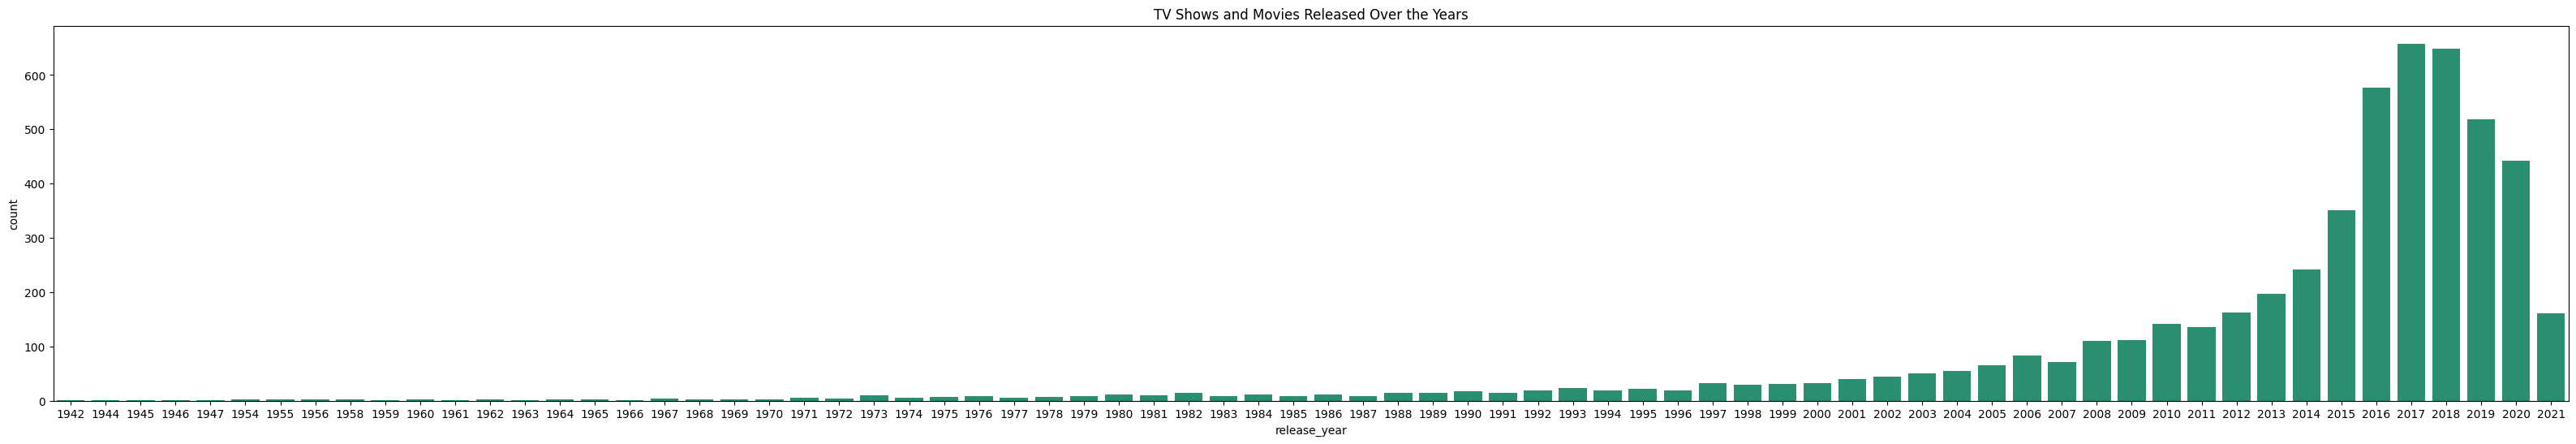

In [ ]:
plt.figure(figsize=(40,6))
sns.countplot(x='release_year', data=df)
plt.title("TV Shows and Movies Released Over the Years");

Over the years, there is an increase number of shows and movies being produced/released and it peaked in 2017. However, after 2017, there seems to be a drop.

In [ ]:
release_year_recent = df[df['release_year'] >= 2000]

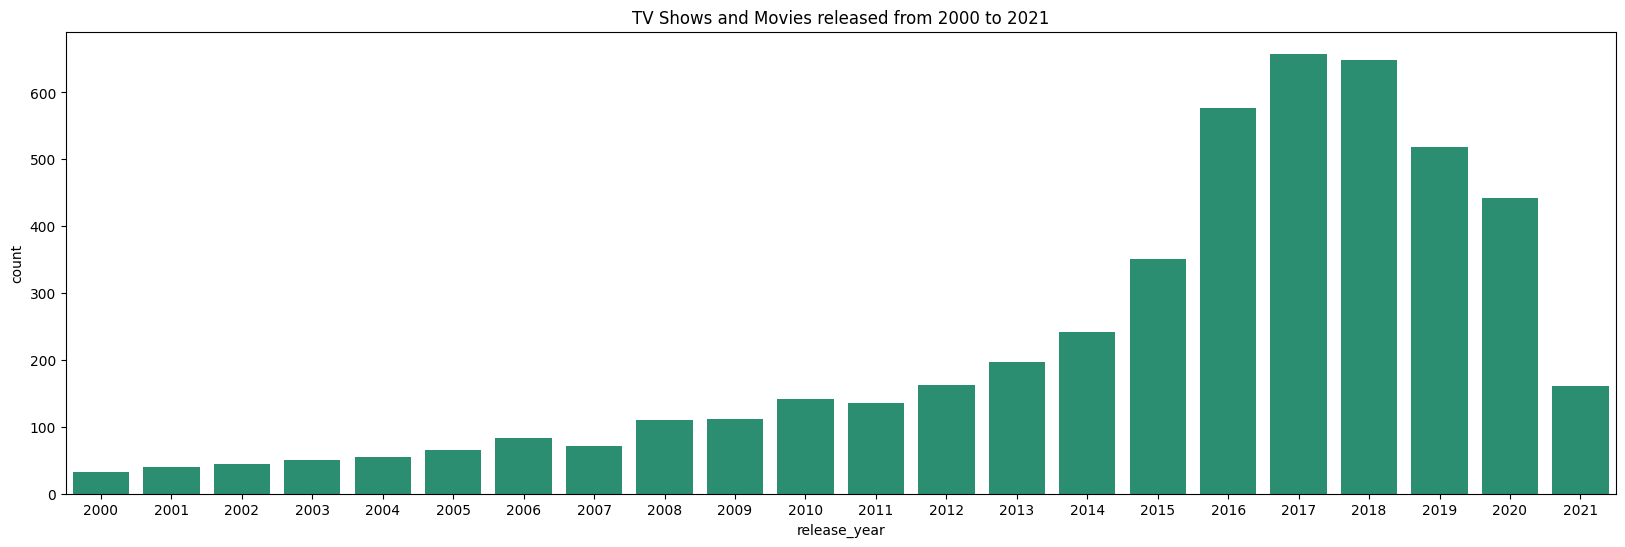

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='release_year', data=release_year_recent)
plt.title("TV Shows and Movies released from 2000 to 2021");

The above chart looks at shows and movies only released from the 2000s and onward. As mentioned earlier, there was a peak in 2017 and a slight drop from 2018 to 2020; however, there seems to be a huge drop in shows and movies being released after 2020. One likely explanation for this drop could be due to the Covid-19 Panademic. During this time period, people were asked to stay home and have no contact with anyone due to the risk of contracting the virus. This sudden pandemic put film production companies on halt and so they couldn't produce anything.

We can make the assumption that following 2021 to 2022, the number of shows and movies released keeps decreasing until mid to end year of 2022 and beginning of 2023 since the public now knows how to safely protect and distant themselves.

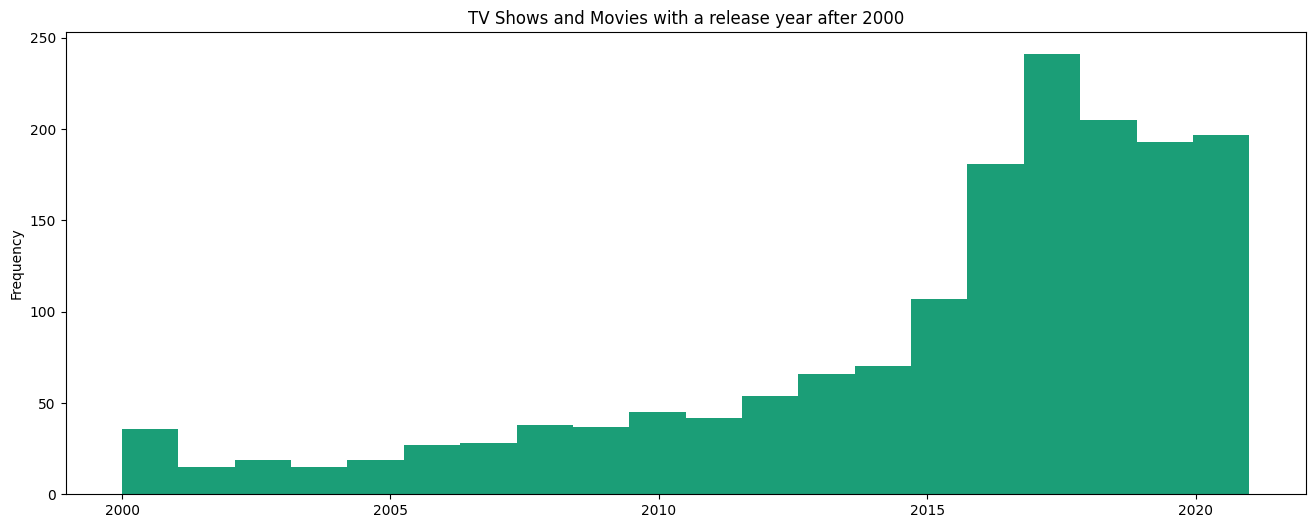

In [ ]:
release_year_recent = df[(df['release_year'] >= 2000) & (df['country'] == "United States")]

release_year_recent['release_year'].plot(kind='hist', bins=20, figsize=(16,6))
plt.title("TV Shows and Movies with a release year after 2000");

6. Which director(s) have the most movies filmed? Which has the least?

In [ ]:
directors_df = df[df['type'] == 'Movie']

In [ ]:
directors = ", ".join(directors_df['director']).split(", ")

In [ ]:
Counter(directors).most_common(10)

[('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Jay Karas', 15),
 ('Marcus Raboy', 14),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 11),
 ('Don Michael Paul', 10)]

In [ ]:
directors_df2 = pd.DataFrame(directors)

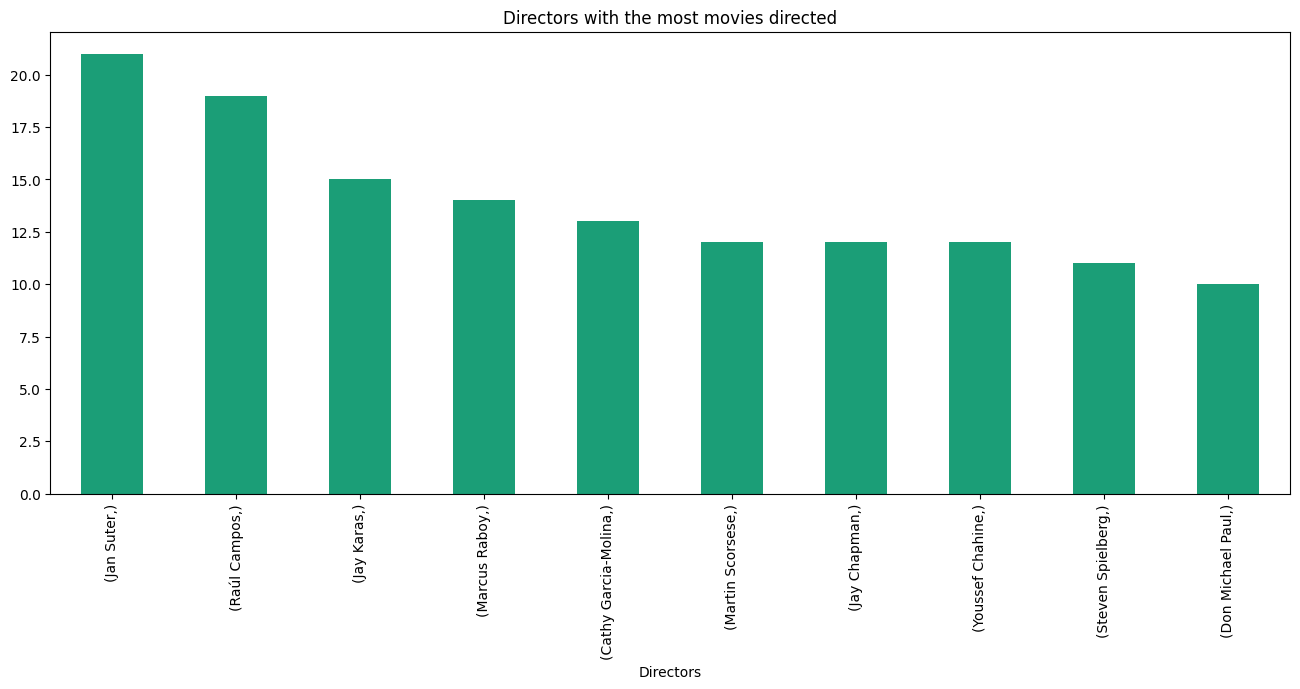

In [ ]:
directors_most_film = directors_df2.value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(16,6))
directors_most_film.plot(kind='bar')
plt.title("Directors with the most movies directed")
plt.xlabel('Directors');

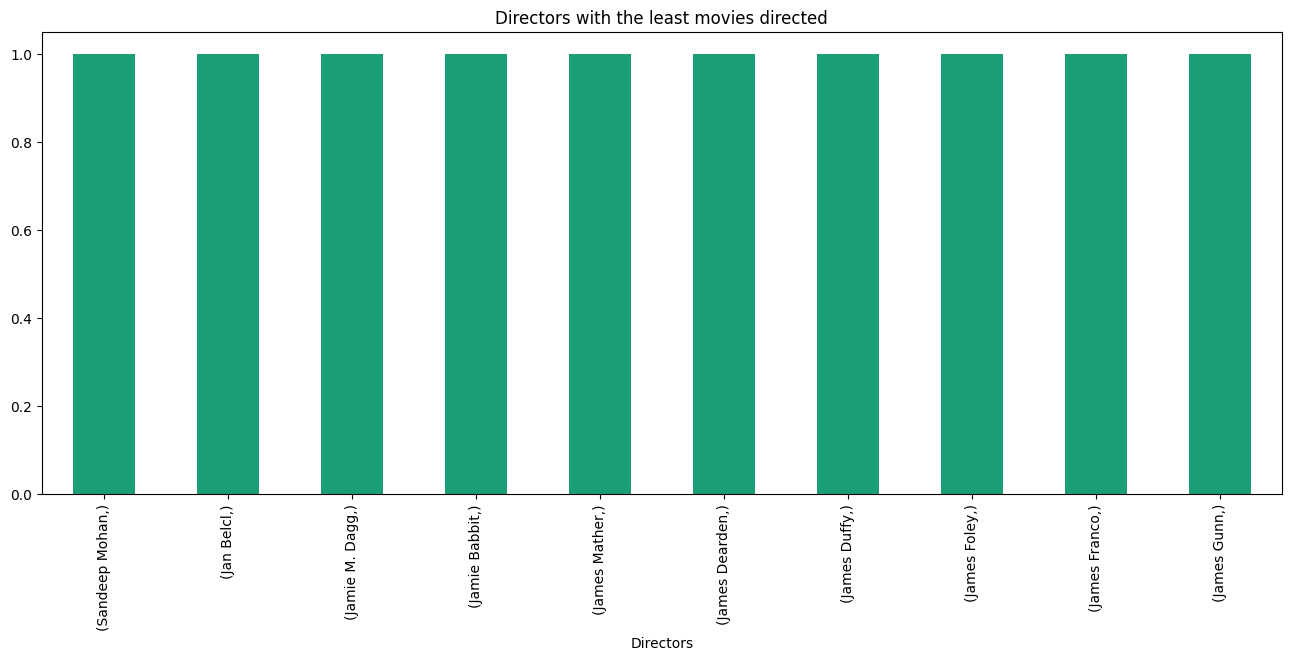

In [ ]:
directors_least_film = directors_df2.value_counts().sort_values(ascending=True).head(10)

plt.figure(figsize=(16,6))
directors_least_film.plot(kind='bar')
plt.title("Directors with the least movies directed")
plt.xlabel('Directors');

Both bar chart shows top 10 directors with the most and least movies directed.
Jan Suter has directed a total of 21 movies, making him the director with the most films (those added to Netflix) directed. Raul Campos follows in second, with a record of 19 films and Jay Karas in third with 15 films. As for the directors with the least movies directed, all 10 of them has only directed 1 movie.

7. Which cast(s) has the most movies filmed?

In [ ]:
cast_df = df[df['type'] == 'Movie']

In [ ]:
cast_categories = ", ".join(cast_df['cast']).split(", ")
Counter(cast_categories).most_common(10)

[('Anupam Kher', 42),
 ('Shah Rukh Khan', 34),
 ('Naseeruddin Shah', 31),
 ('Akshay Kumar', 30),
 ('Om Puri', 30),
 ('Amitabh Bachchan', 28),
 ('Paresh Rawal', 28),
 ('Boman Irani', 27),
 ('Kareena Kapoor', 25),
 ('Samuel L. Jackson', 21)]

In [ ]:
cast_df2 = pd.DataFrame(cast_categories)

In [ ]:
cast_most_films = cast_df2.value_counts().sort_values(ascending=False).head(10)

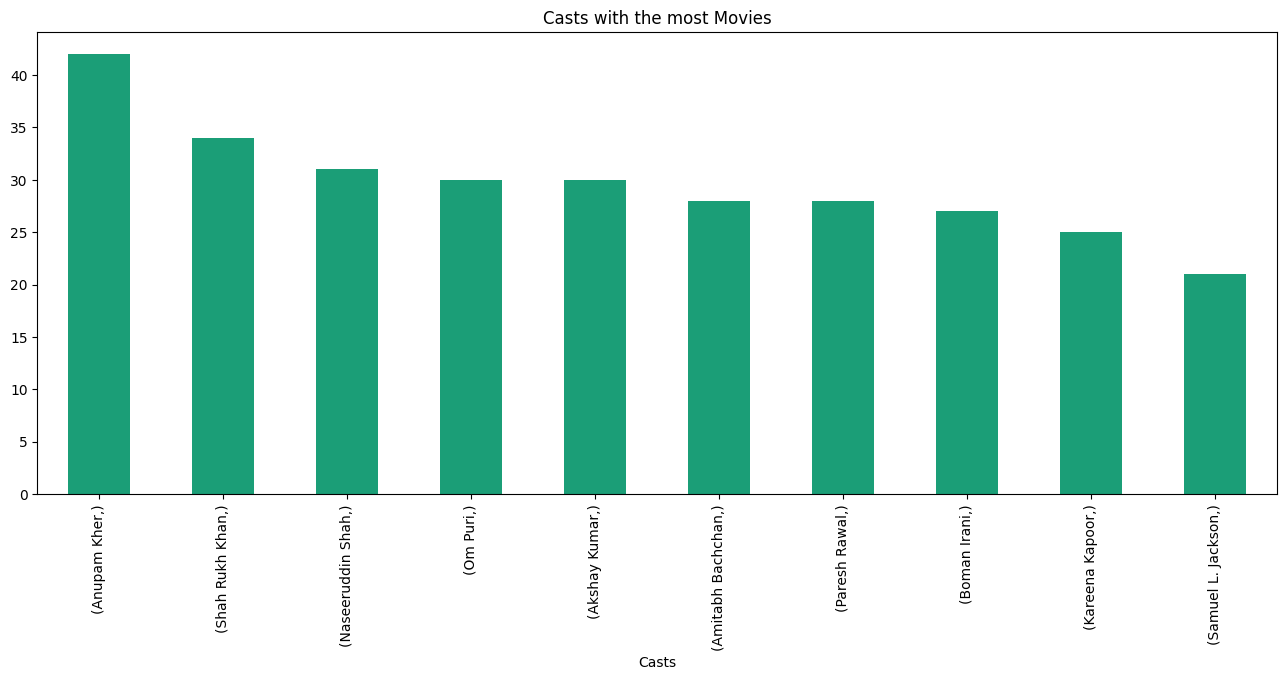

In [ ]:
cast_most_films.plot(kind='bar', figsize=(16,6))
plt.title("Casts with the most Movies")
plt.xlabel("Casts");

The above chart returns the top 10 actors and actresses who have been in the most movies. Anupan Kher has been in a total of 42 movies, Shah Rukh Khan has been in 34, and Naseeruddin Shah in 31. Among the 10, Samuel L. Jackson has the least with only having been in around 24 films.